Uvoz knjižnic in branje podatkov iz datotek:

In [59]:
import matplotlib.pyplot as plt
from collections import defaultdict
import pandas as pd
import numpy as np

In [60]:
list_of_cvs = ["./podatki/kd{}.csv".format(i) for i in range(2010,2020)]
frames = [pd.read_csv(csv,sep=';', encoding="UTF-8", dtype={'MesecStoritve': str}) for csv in list_of_cvs]
df = pd.concat(frames)

C:\Users\Médo\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3301: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  if await self.run_code(code, result, async_=asy):
C:\Users\Médo\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3301: DtypeWarning: Columns (14,17,18) have mixed types.Specify dtype option on import or set low_memory=False.
  if await self.run_code(code, result, async_=asy):


Kazniva dejanja po letih:

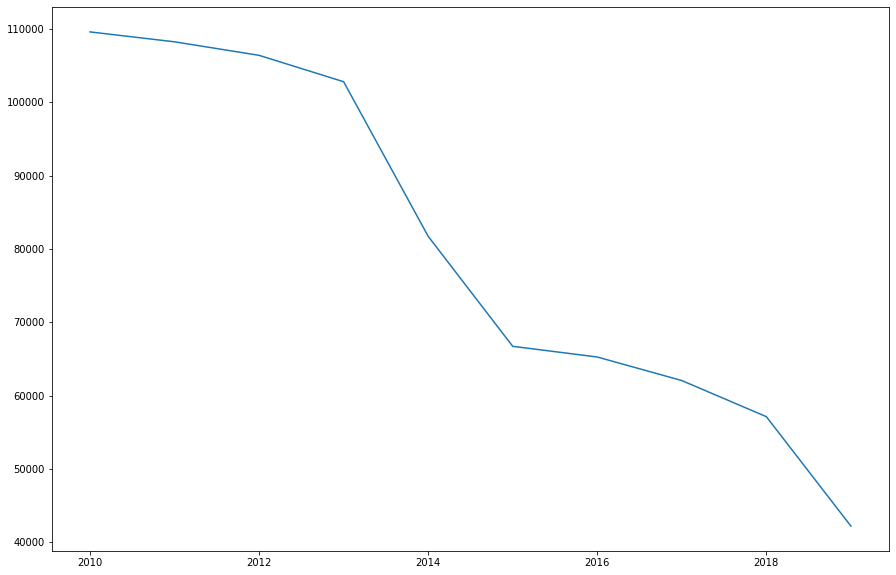

In [81]:
#group by mesec, count unique id
kd_leto = df.groupby(['MesecStoritve', 'UraStoritve','ZaporednaStevilkaKD'])
leto_counter = defaultdict(int)

for name,v in kd_leto:
    index = int((name[0].split(".")[1]))
    if index >= 2010 and index < 2020:
        leto_counter[index] +=1
    
    
list_mes_counter = sorted(leto_counter.items())
mesec, counter = zip(*list_mes_counter)
plt.figure(figsize=(15,10))
plt.plot(mesec,counter)
plt.show()

Porazdelitev kaznivih dejanj po mesecih:

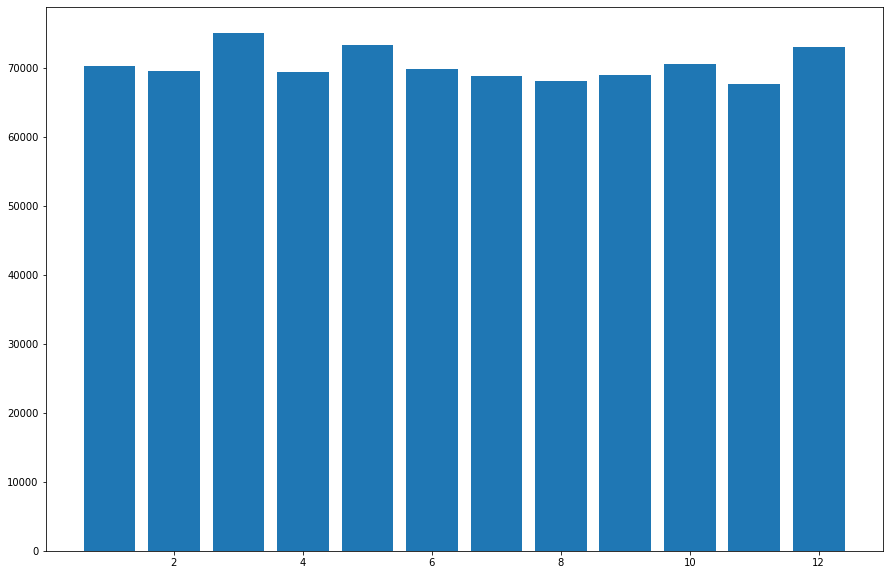

In [91]:
kd_mes = df.groupby(['MesecStoritve', 'UraStoritve','ZaporednaStevilkaKD'])
mes_counter = defaultdict(int)

for name,v in kd_mes:
    index = int((name[0].split(".")[0]))
    mes_counter[index] +=1


list_mes_counter = sorted(mes_counter.items())
mesec, counter = zip(*list_mes_counter)
plt.figure(figsize=(15,10))
plt.bar(mesec,counter)
plt.show()

Udeleženci v kaznivih dejanjih porazdeljeni po starostnih razredih:

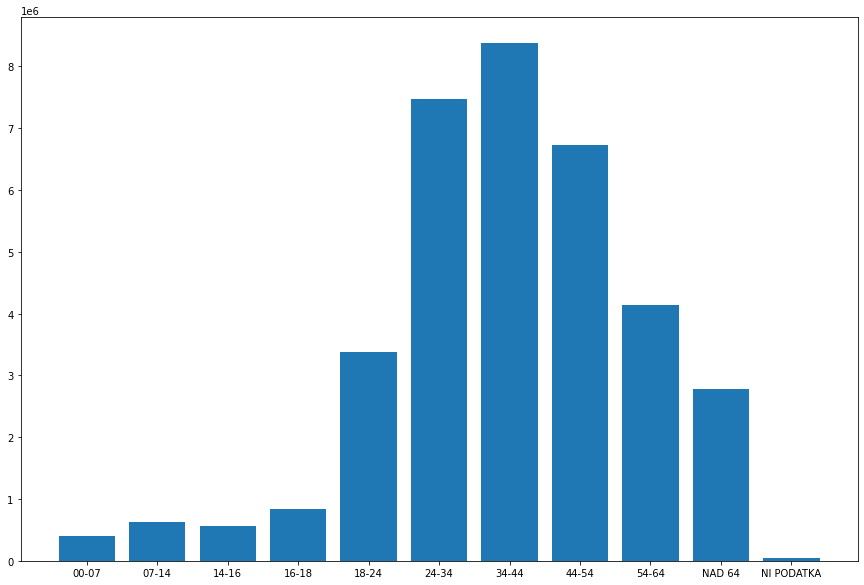

In [65]:
star_razredi = df.groupby(['StarostniRazred'])
star_razred, star_stevilo = zip(*[(name,razred.size) for name, razred in star_razredi])

star_stevilo = list(star_stevilo)
star_stevilo[-3] += star_stevilo[-2]

plt.figure(figsize=(15,10))
plt.bar(star_razred[:-2],star_stevilo[:-2])
plt.show()
#plt.pie(star_stevilo[:-3], labels=star_razred[:-3])